# **Capstone Module 2**
Karina Fidelia Ramadhani - JCDSOH01-003

## **I. LATAR BELAKANG**


Seiring dengan perkembangan dunia digital, kebutuhan software untuk menunjang bisnis suatu perusahaan akan meningkat. 
Amazon Web Services (AWS) adalah platform cloud global dan layanan infrastruktur yang ditawarkan oleh Amazon yang menyediakan berbagai layanan seperti daya komputasi, penyimpanan database, jaringan, basis data, alat keamanan dan lain-lainnya. 
Dengan memahami permintaan pasar, kami bertujuan untuk membuka potensi produk baru dan mendorong inovasi di pasar. Namun sebelum itu, kita perlu memahami bagaimana penjualan produk-produk kita yang sudah memasuki pasar.


## **II. RUMUSAN MASALAH**


1. Produk apa yang profitable?
2. Negara apa 

## **III. DATA**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

 1. Row ID: A unique identifier for each transaction.
 2. Order ID: A unique identifier for each order.
 3. Order Date: The date when the order was placed.
 4. Date Key: A numerical representation of the order date (YYYYMMDD).
 5. Contact Name: The name of the person who placed the order.
 6. Country: The country where the order was placed.
 7. City: The city where the order was placed.
 8. Region: The region where the order was placed.
 9. Subregion: The subregion where the order was placed.
 10. Customer: The name of the company that placed the order.
 11. Customer ID: A unique identifier for each customer.
 12. Industry: The industry the customer belongs to.
 13. Segment: The customer segment (SMB, Strategic, Enterprise, etc.).
 14. Product: The product was ordered.
 15. License: The license key for the product.
 16. Sales: The total sales amount for the transaction.
 17. Quantity: The total number of items in the transaction.
 18. Discount: The discount applied to the transaction.
 19. Profit: The profit from the transaction

In [2]:
df= pd.read_csv("SaaS-Sales.csv")
df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


### **Data Cleaning**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [4]:
display(df.describe(), df.describe(include='object'))

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


In [5]:
pd.set_option('display.max_colwidth', None)

# data unique per kolom
listItem= []
for col in df.columns:
    listItem.append([col, df[col].nunique(), df[col].unique()])

table_unique= pd.DataFrame(columns= ["Column Name", "Number of Unique", "Unique Sample"],
                           data= listItem)
table_unique

,Column Name,Number of Unique,Unique Sample
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, AMER-2020-115259, AMER-2021-110457, EMEA-2021-136476, APJ-2022-103730, APJ-2020-152030, APJ-2020-134614, AMER-2023-107272, AMER-2022-125969, AMER-2023-164147, AMER-2022-145583, EMEA-2022-110366, AMER-2023-106180, EMEA-2023-155376, AMER-2021-110744, AMER-2020-110072, EMEA-2022-114489, AMER-2022-158834, AMER-2021-124919, AMER-2021-118948, AMER-2020-104269, APJ-2022-114104, AMER-2022-162733, EMEA-2021-119697, APJ-2022-154508, AMER-2022-113817, APJ-2020-139892, AMER-2020-118962, APJ-2020-100853, APJ-2023-152366, AMER-2021-101511, EMEA-2021-137225, APJ-2020-166191, EMEA-2020-158274, EMEA-2022-105018, AMER-2020-123260, APJ-2022-157000, EMEA-2021-102281, AMER-2021-131457, AMER-2020-140004, AMER-2023-107720, EMEA-2023-124303, AMER-2023-105074, EMEA-2020-133690, APJ-2023-116701, ...]"
2,Order Date,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4/16/2023, 12/6/2022, 11/22/2021, 11/11/2020, 5/13/2020, 8/27/2020, 12/10/2022, 7/17/2023, 9/25/2021, 1/16/2022, 9/17/2021, 10/20/2023, 12/9/2022, 12/27/2021, 9/11/2023, 7/18/2022, 9/20/2023, 3/12/2022, 10/20/2020, 6/21/2022, 4/18/2021, 12/12/2022, 6/18/2022, 11/24/2021, 4/30/2021, 12/5/2020, 6/5/2022, 9/19/2022, 9/15/2023, 4/26/2021, 12/10/2023, 11/26/2020, 10/12/2020, 9/3/2021, 11/14/2023, 5/29/2023, 10/27/2023, 4/6/2022, 9/18/2022, 1/31/2021, 11/7/2023, 11/10/2023, 6/18/2023, 9/7/2022, 8/30/2022, 12/2/2022, 11/13/2021, 11/24/2023, 10/15/2021, 12/26/2023, 11/4/2022, 8/25/2020, 3/2/2021, 4/5/2021, 12/26/2020, 9/20/2020, 11/6/2023, 11/7/2022, 2/3/2023, 10/14/2022, 9/6/2022, 9/19/2023, 12/23/2023, 9/7/2021, 10/22/2020, 3/14/2022, 5/31/2021, 5/28/2021, 3/1/2020, 11/21/2022, 5/12/2022, 12/28/2021, 11/17/2022, 11/8/2022, 9/8/2020, 8/5/2020, 9/14/2020, 4/22/2023, 11/21/2021, 12/15/2021, 11/19/2020, 11/29/2022, 8/26/2020, 7/17/2022, 10/12/2021, 10/31/2021, 3/21/2020, 7/7/2023, 6/25/2023, 8/3/2020, 12/18/2023, 6/4/2023, 12/2/2023, 2/9/2021, 1/2/2021, 10/29/2022, ...]"
3,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230416, 20221206, 20211122, 20201111, 20200513, 20200827, 20221210, 20230717, 20210925, 20220116, 20210917, 20231020, 20221209, 20211227, 20230911, 20220718, 20230920, 20220312, 20201020, 20220621, 20210418, 20221212, 20220618, 20211124, 20210430, 20201205, 20220605, 20220919, 20230915, 20210426, 20231210, 20201126, 20201012, 20210903, 20231114, 20230529, 20231027, 20220406, 20220918, 20210131, 20231107, 20231110, 20230618, 20220907, 20220830, 20221202, 20211113, 20231124, 20211015, 20231226, 20221104, 20200825, 20210302, 20210405, 202

In [6]:
df.isna().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

### **Data Analysis**

Berdasarkan dataset di atas, kita akan menganalisa **faktor apa saja yang mempengaruhi tingkat sales dan profit** berdasarkan feature yang tersedia. 

In [8]:
df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [9]:
df_numerik= df.select_dtypes(include=['number'])
df_numerik.corr()

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
Row ID,1.000000,0.014658,0.029609,-0.001359,-0.004016,0.013480,0.012497
Date Key,0.014658,1.000000,0.004108,-0.009799,-0.005097,-0.002767,0.004609
Customer ID,0.029609,0.004108,1.000000,0.003729,-0.006892,0.003068,0.006864
Sales,-0.001359,-0.009799,0.003729,1.000000,0.200795,-0.028190,0.479064
Quantity,-0.004016,-0.005097,-0.006892,0.200795,1.000000,0.008623,0.066253
Discount,0.013480,-0.002767,0.003068,-0.028190,0.008623,1.000000,-0.219487
Profit,0.012497,0.004609,0.006864,0.479064,0.066253,-0.219487,1.000000


<Axes: xlabel='Sales', ylabel='Profit'>

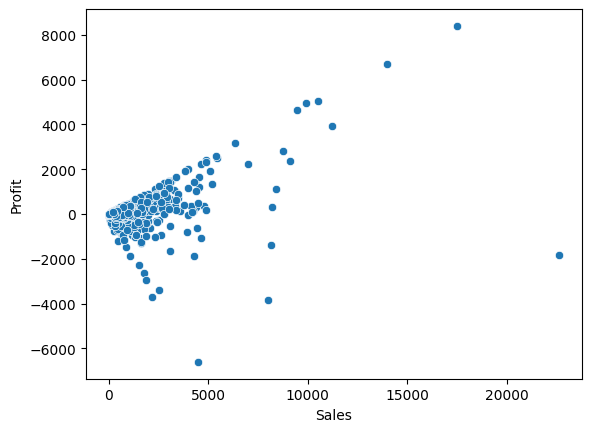

In [10]:
sns.scatterplot(data= df,
                x= "Sales",
                y= "Profit")

### 1) Analisa Geografis
- Negara apa yang memiliki tingkat sales tertinggi?
- Berdasarkan negara dengan sales tertinggi, kota mana yang menghasilkan sales tertinggi?
- Kota mana yang menghasilkan profit tertinggi?

In [11]:
df1= df[["Sales", "Profit", "Country", "City", "Region", "Subregion"]]
df1

,Sales,Profit,Country,City,Region,Subregion
0,261.9600,41.9136,Ireland,Dublin,EMEA,UKIR
1,731.9400,219.5820,Ireland,Dublin,EMEA,UKIR
2,14.6200,6.8714,United States,New York City,AMER,NAMER
3,957.5775,-383.0310,Germany,Stuttgart,EMEA,EU-WEST
4,22.3680,2.5164,Germany,Stuttgart,EMEA,EU-WEST
...,...,...,...,...,...,...
9989,25.2480,4.1028,Germany,Hamburg,EMEA,EU-WEST
9990,91.9600,15.6332,United States,Milwaukee,AMER,NAMER
9991,258.5760,19.3932,United States,Milwaukee,AMER,NAMER
9992,29.6000,13.3200,United States,Milwaukee,AMER,NAMER


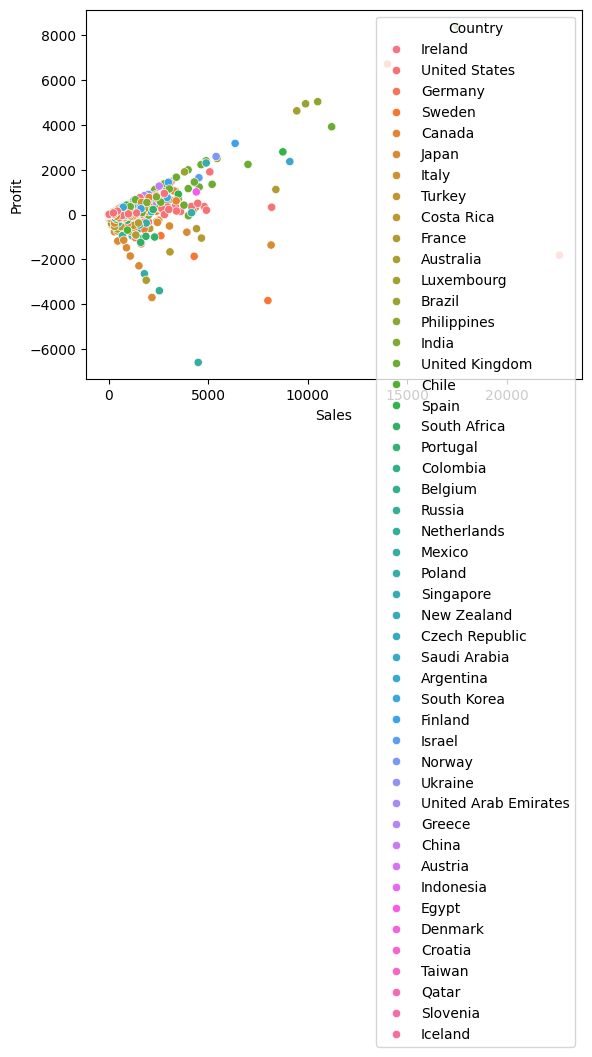

In [12]:
sns.scatterplot(data= df1,
                x= "Sales",
                y= "Profit",
                hue= "Country")
plt.show()

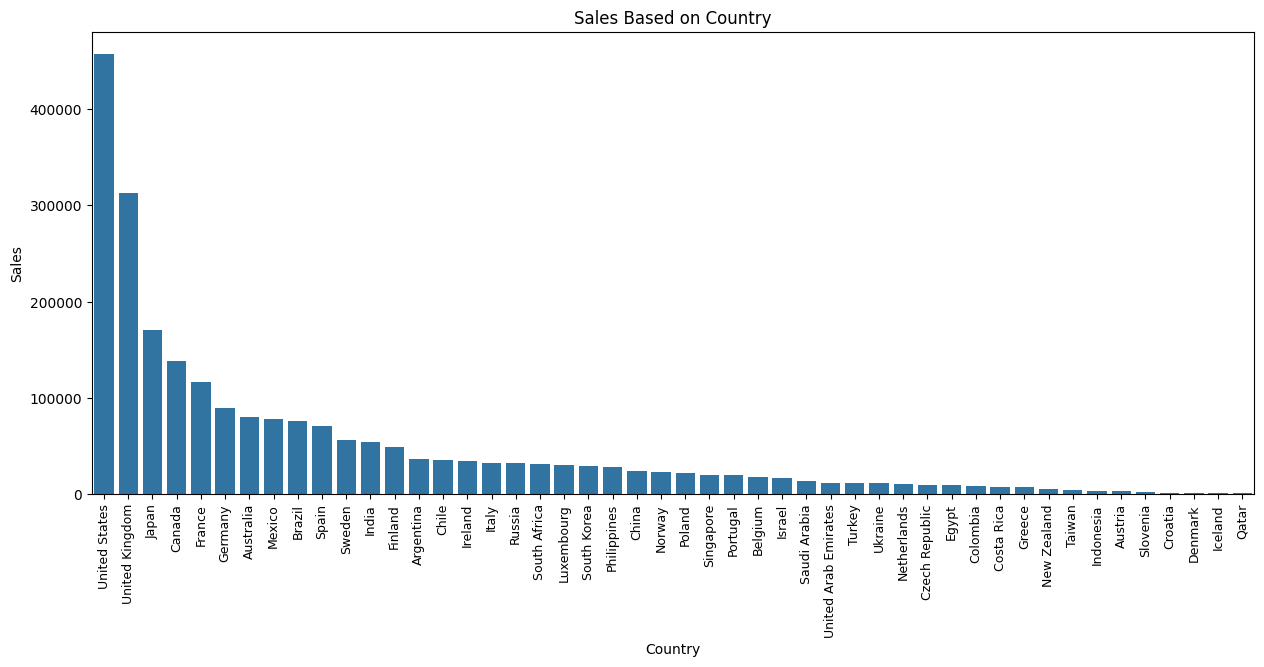

In [13]:
# Sales based on Country
df1_sales= df1.groupby("Country")["Sales"].sum().sort_values(ascending= False)

plt.figure(figsize= (15,6))
sns.barplot(data= df1,
            x= "Country",
            y= "Sales",
            estimator= np.sum,
            ci= None,
            order= df1_sales.index)
plt.xticks(rotation= 90,
           fontsize= 9)
plt.title("Sales Based on Country")
plt.show()

**United States** menjadi negara dengan jumlah sales tertinggi.

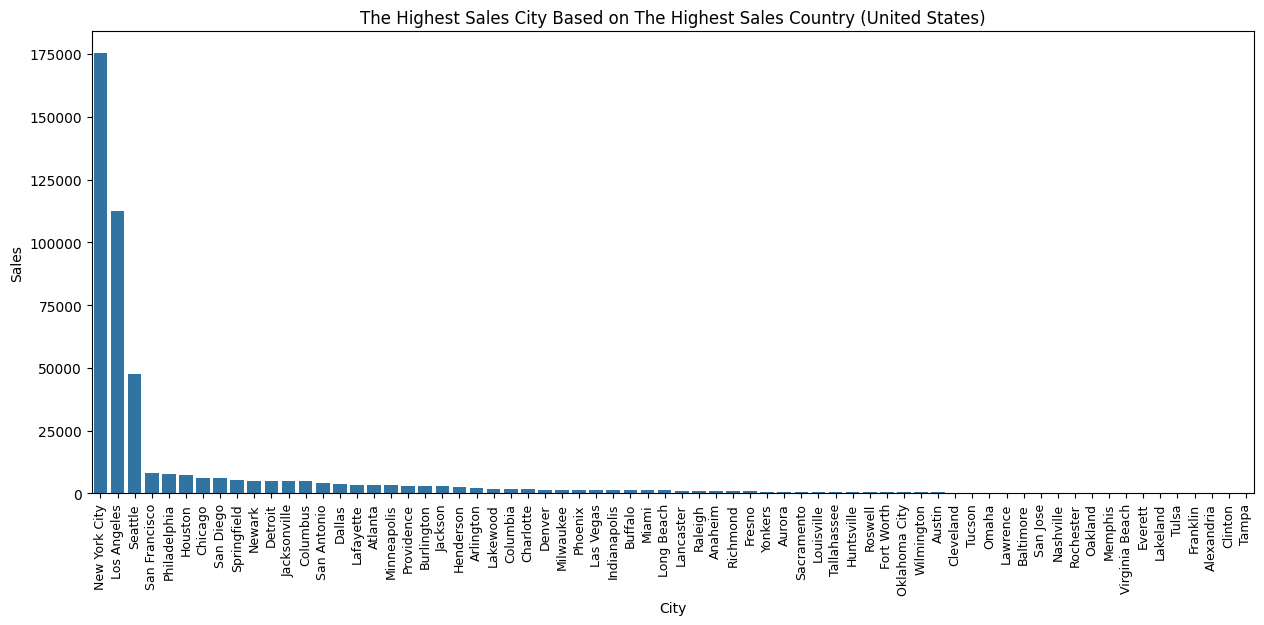

In [14]:
# The highest sales city based on the highest sales country
df1_country= df1[df1["Country"]=="United States"]

df1_city= df1_country.groupby("City")["Sales"].sum().sort_values(ascending= False)


plt.figure(figsize= (15,6))
sns.barplot(data= df1_country,
            x= "City",
            y= "Sales",
            estimator= np.sum,
            ci= None,
            order= df1_city.index)
plt.xticks(rotation= 90,
           fontsize= 9)
plt.title("The Highest Sales City Based on The Highest Sales Country (United States)")
plt.show()

Kota **New York** menjadi kota dengan sales tertinggi di United States. 

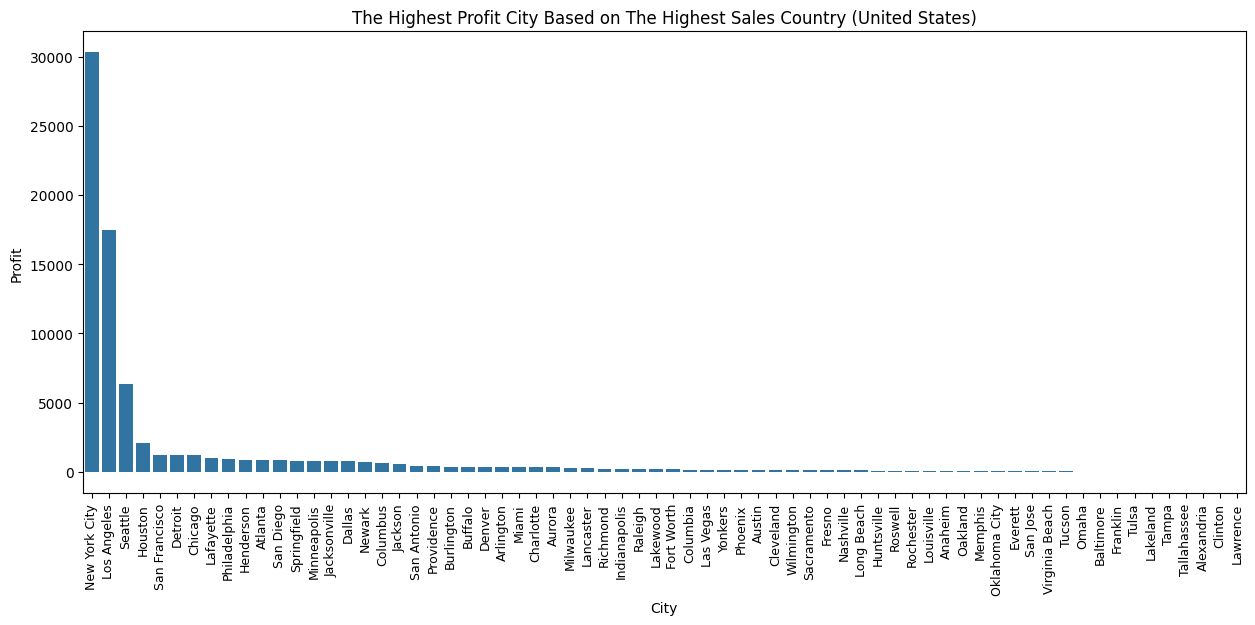

In [15]:
# The highest profit city based on the highest sales country
df1_country= df1[df1["Country"]=="United States"]

df1_city= df1_country.groupby("City")["Profit"].sum().sort_values(ascending= False)


plt.figure(figsize= (15,6))
sns.barplot(data= df1_country,
            x= "City",
            y= "Profit",
            estimator= np.sum,
            ci= None,
            order= df1_city.index)
plt.xticks(rotation= 90,
           fontsize= 9)
plt.title("The Highest Profit City Based on The Highest Sales Country (United States)")
plt.show()

Sejalan dengan sales, kota **New York** menjadi kota penghasil profit tertinggi di United States. 

In [16]:
profit= df1.loc[df1["City"]=="New York City", "Profit"]
profit

2         6.8714
5        14.1694
6         1.9656
7        90.7152
8         5.7825
          ...   
9976     31.1980
9977      0.0000
9978      4.6816
9979    153.1152
9986     15.2208
Name: Profit, Length: 740, dtype: float64

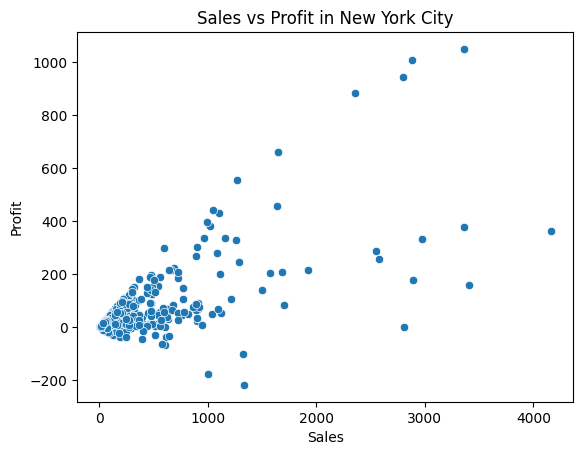

In [17]:
# Correlation between sales and profit in New York City
sales= df1.loc[df1["City"]=="New York City", "Sales"]
profit= df1.loc[df1["City"]=="New York City", "Profit"]

sns.scatterplot(data= df1,
                x= sales,
                y= profit)
plt.title("Sales vs Profit in New York City")
plt.show()

- Terlihat ada korelasi positif → semakin tinggi Sales, cenderung semakin tinggi Profit.
- Namun hubungannya tidak linier sempurna, masih banyak outlier.

- Titik terkumpul di sales kecil dengan profit kecil -> meski secara jumlah sales kota New York termasuk tertinggi, namun nilai per transaksinya kecil.
- Ada transaksi yang profitnya negatif (rugi), bisa jadi pemberian diskon terlalu tinggi.



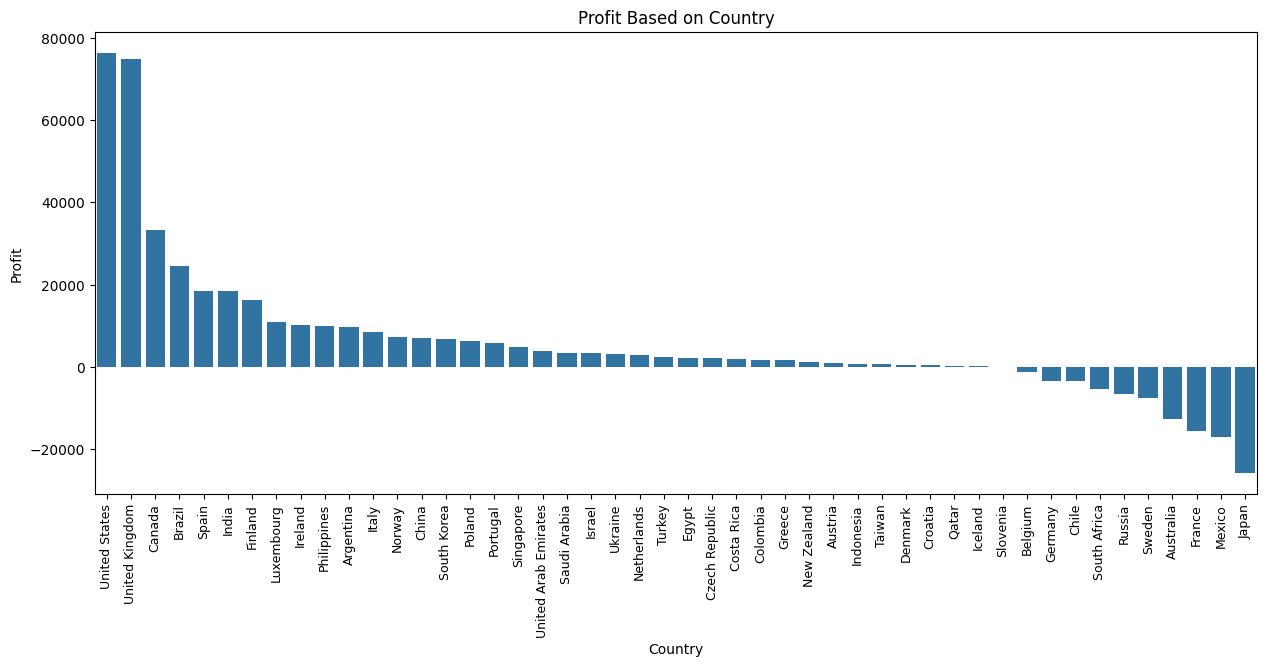

In [18]:
# Profit based on Country
df1_profit= df1.groupby("Country")["Profit"].sum().sort_values(ascending= False)

plt.figure(figsize= (15,6))
sns.barplot(data= df1,
            x= "Country",
            y= "Profit",
            estimator= np.sum,
            ci= None,
            order= df1_profit.index)
plt.xticks(rotation= 90,
           fontsize= 9)
plt.title("Profit Based on Country")
plt.show()

- Negara **United States** menjadi negara dengan profit tertinggi, sejalan dengan salesnya.
- **Jepang** menjadi negara dengan profit terendah.

In [43]:
df1_world= df.groupby("Country")[["Sales"]].sum().reset_index() 

world_maps= folium.Map(zoom_start= 10)

world= folium.Choropleth(geo_data= "world.geojson",
                         data= df1_world,
                         columns= ["Country", "Sales"],
                         key_on= "feature.properties.NAME",
                         fill_opacity=0.7)

# marker
sales_marker= folium.Marker(location= (40.14226510979611, -100.03391280484213),
                            popup= "United States",
                            tooltip= "Highest Sales Country",
                            icon= folium.Icon(color= "red"))

city_marker= folium.Marker(location= (40.71124784857795, -74.02488718782335),
                            popup= "New York City",
                            tooltip= "Highest Sales City",
                            icon= folium.Icon(color= "blue"))

world_maps.add_child(world)
world_maps.add_child(sales_marker)
world_maps.add_child(city_marker)


### 2) Analisa Waktu
- Bagaimana sales dan profit per bulan/tahun?
- Berapa growth rate per tahunnya?


In [20]:
df2= df[["Sales", "Profit", "Order Date", "Date Key", "Product"]]
df2["Order Date"]= pd.to_datetime(df2["Order Date"])
df2["Order Year"]= df2["Order Date"].apply(lambda x: x.year)
df2.head()

,Sales,Profit,Order Date,Date Key,Product,Order Year
0,261.9600,41.9136,2022-11-09,20221109,Marketing Suite,2022
1,731.9400,219.5820,2022-11-09,20221109,FinanceHub,2022
2,14.6200,6.8714,2022-06-13,20220613,FinanceHub,2022
3,957.5775,-383.0310,2021-10-11,20211011,ContactMatcher,2021
4,22.3680,2.5164,2021-10-11,20211011,Marketing Suite - Gold,2021


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Sales       9994 non-null   float64       
 1   Profit      9994 non-null   float64       
 2   Order Date  9994 non-null   datetime64[ns]
 3   Date Key    9994 non-null   int64         
 4   Product     9994 non-null   object        
 5   Order Year  9994 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 468.6+ KB


In [22]:
df2["Product"].unique()

array(['Marketing Suite', 'FinanceHub', 'ContactMatcher',
       'Marketing Suite - Gold', 'SaaS Connector Pack', 'ChatBot Plugin',
       'Site Analytics', 'OneView', 'Support', 'Data Smasher',
       'SaaS Connector Pack - Gold', 'Storage', 'Big Ol Database',
       'Alchemy'], dtype=object)

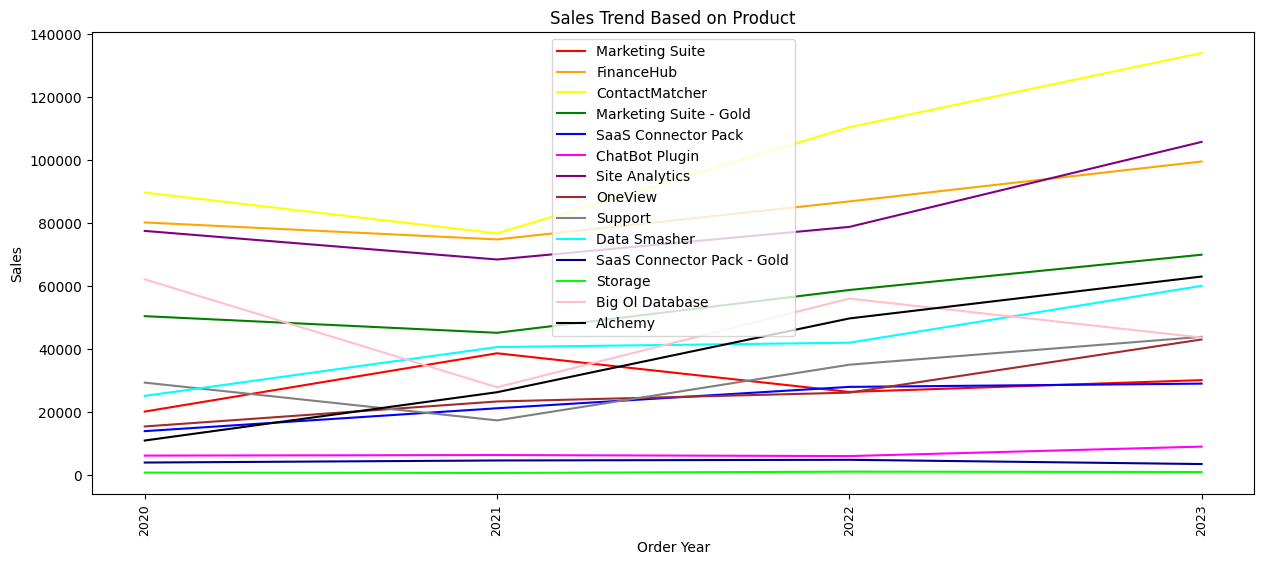

In [23]:
# Sales trend based on product
plt.figure(figsize= (15,6))
sns.lineplot(data= df2,
             x= "Order Year",
             y= "Sales",
             hue= "Product",
             estimator= np.sum,
             ci= None,
             palette= {"Marketing Suite": "Red",
                       "FinanceHub": "Orange", 
                       "ContactMatcher": "yellow",
                       "Marketing Suite - Gold": "green", 
                       "SaaS Connector Pack": "blue", 
                       "ChatBot Plugin": "magenta",
                       "Site Analytics": "purple", 
                       "OneView": "brown",
                       "Support": "grey", 
                       "Data Smasher": "cyan",
                       "SaaS Connector Pack - Gold": "darkblue",
                       "Storage": "lime", 
                       "Big Ol Database": "pink",
                       "Alchemy": "black"})
plt.xticks(ticks= sorted(df2["Order Year"].unique()),
           labels= sorted(df2["Order Year"].unique()),
           rotation= 90,
           fontsize= 9)
plt.legend()
plt.title("Sales Trend Based on Product")
plt.show()

- Produk **ContactMatcher** merupakan produk dengan sales tertinggi dan mengalami pertumbuhan setiap tahunnya
- Sedangkan produk **Storage** merupakan produk dengan sales terendah dan stagnan setiap tahunnya 
 

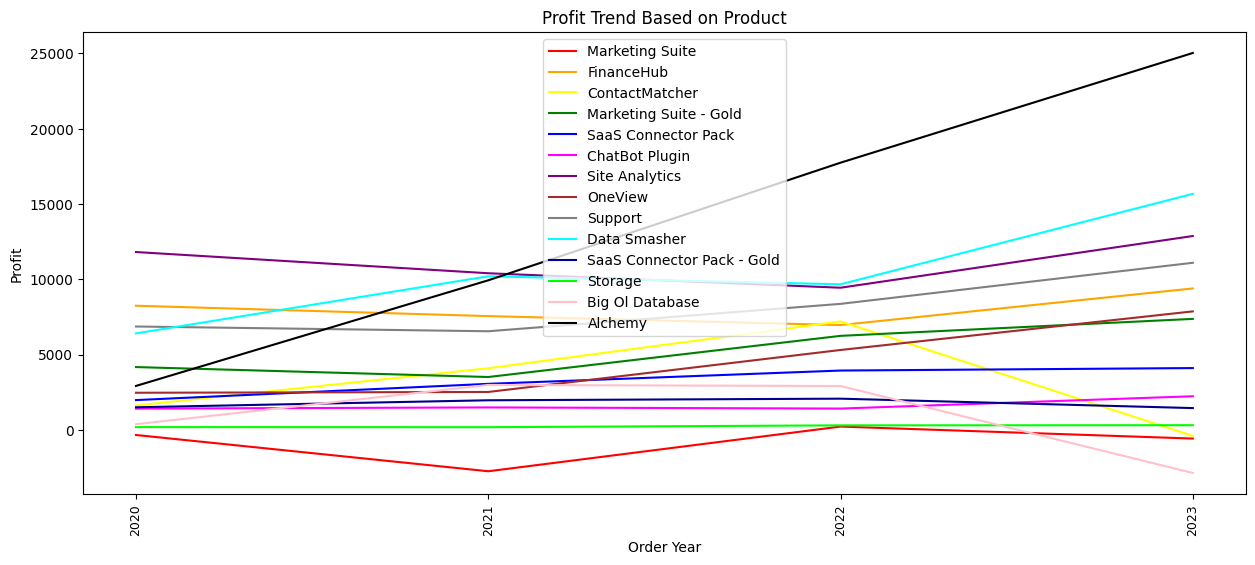

In [24]:
# Profit trend based on product
plt.figure(figsize= (15,6))
sns.lineplot(data= df2,
             x= "Order Year",
             y= "Profit",
             hue= "Product",
             estimator= np.sum,
             ci= None,
             palette= {"Marketing Suite": "Red",
                       "FinanceHub": "Orange", 
                       "ContactMatcher": "yellow",
                       "Marketing Suite - Gold": "green", 
                       "SaaS Connector Pack": "blue", 
                       "ChatBot Plugin": "magenta",
                       "Site Analytics": "purple", 
                       "OneView": "brown",
                       "Support": "grey", 
                       "Data Smasher": "cyan",
                       "SaaS Connector Pack - Gold": "darkblue",
                       "Storage": "lime", 
                       "Big Ol Database": "pink",
                       "Alchemy": "black"})
plt.xticks(ticks= sorted(df2["Order Year"].unique()),
           labels= sorted(df2["Order Year"].unique()),
           rotation= 90,
           fontsize= 9)
plt.legend()
plt.title("Profit Trend Based on Product")
plt.show()

- Produk **Alchemy** merupakan produk dengan profit tertinggi yang mengalami peningkatan signifikan setiap tahunnya.
- Sedangkan produk **Big Ol Database** dan **Contact Marker** merupakan produk yang mengalami penurunan profit signifikan dari tahun 2022 sampai 2023

In [25]:
# Year-Over-Year (YoY) growth rate
df_year= df2.groupby("Order Year")[["Sales", "Profit"]].sum().reset_index()
df_year["Sales_Growth"]= df_year["Sales"].pct_change()*100
df_year["Profit_Growth"]= df_year["Profit"].pct_change()*100
df_year

,Order Year,Sales,Profit,Sales_Growth,Profit_Growth
0,2020,484247.4981,49543.9741,NaN,NaN
1,2021,470532.5090,61618.6037,-2.832227,24.371540
2,2022,608473.8300,81726.9308,29.316002,32.633533
3,2023,733947.0232,93507.5131,20.620968,14.414566


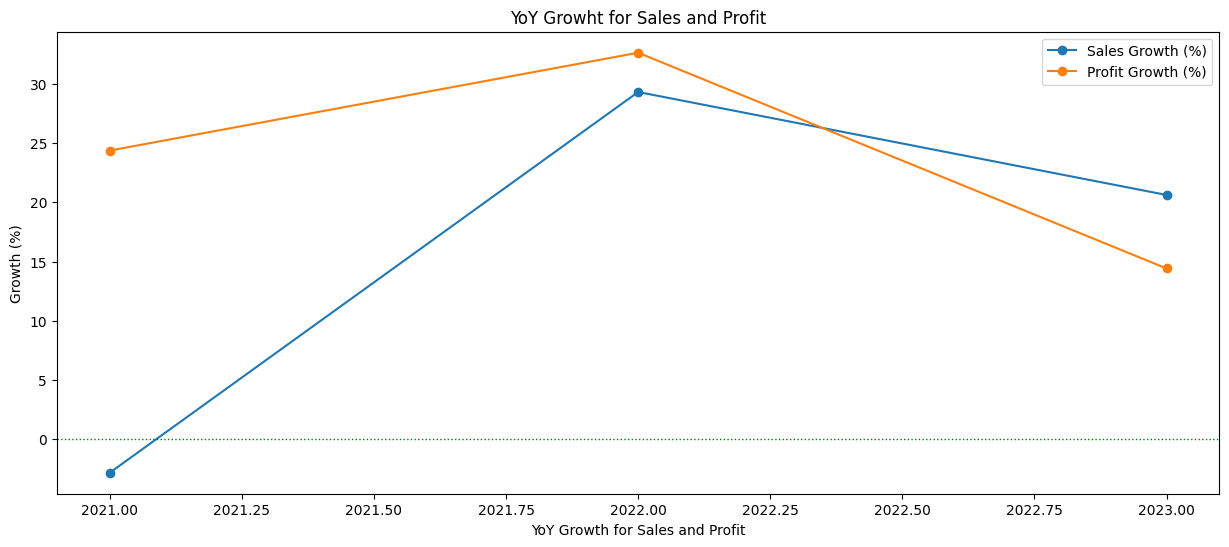

In [26]:
plt.figure(figsize= (15,6))
plt.plot(df_year["Order Year"], 
         df_year["Sales_Growth"],
         marker= "o",
         label= "Sales Growth (%)")
plt.plot(df_year["Order Year"], 
         df_year["Profit_Growth"],
         marker= "o",
         label= "Profit Growth (%)")
plt.axhline(0,
            color= "green",
            linestyle= ":",
            linewidth= 1)
plt.xlabel("YoY Growth for Sales and Profit")
plt.ylabel("Growth (%)")
plt.title("YoY Growht for Sales and Profit")
plt.legend()
plt.show()

- Tahun 2022 menjadi puncak Sales dan Profit
- Dan terjadi penurunan dari tahun 2022 sampai 2023

### 3) Analisa Produk
- Produk apa yang memiliki sales tertinggi?
- Produk apa yang menghasilkan profit tertinggi?


In [27]:
df3= df[["Sales", "Profit", "Product"]]
df3

,Sales,Profit,Product
0,261.9600,41.9136,Marketing Suite
1,731.9400,219.5820,FinanceHub
2,14.6200,6.8714,FinanceHub
3,957.5775,-383.0310,ContactMatcher
4,22.3680,2.5164,Marketing Suite - Gold
...,...,...,...
9989,25.2480,4.1028,SaaS Connector Pack
9990,91.9600,15.6332,SaaS Connector Pack
9991,258.5760,19.3932,Site Analytics
9992,29.6000,13.3200,Support


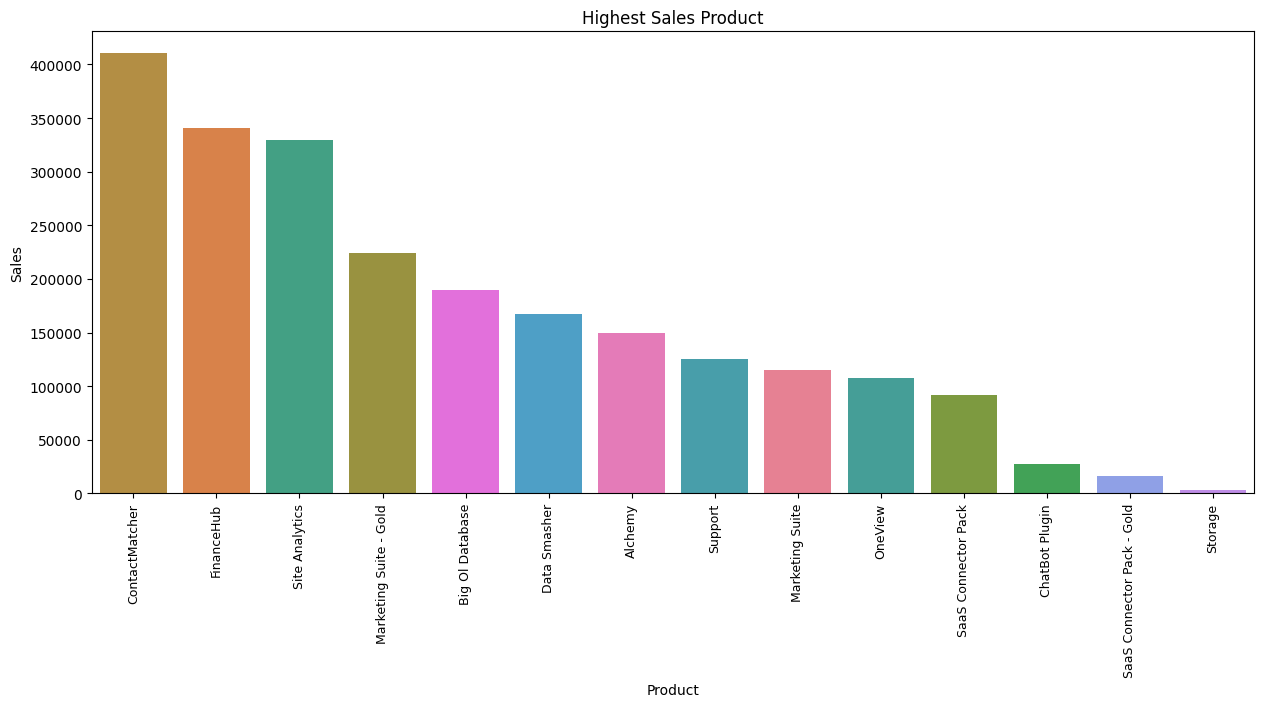

In [28]:
# Highest Sales Product
sort_sales= df3.groupby("Product")["Sales"].sum().sort_values(ascending= False).index

plt.figure(figsize= (15,6))
sns.barplot(data= df3,
            x= "Product",
            y= "Sales",
            estimator= np.sum,
            hue= "Product",
            ci= 0,
            order= sort_sales)
plt.xticks(fontsize= 9,
           rotation= 90)
plt.title("Highest Sales Product")
plt.show()

- Produk **ContactMatcher** menjadi produk dengan jumlah sales tertinggi sepanjang tahun
- Produk **FinanceHub** menjadi produk dengan jumlah sales tertinggi kedua
- Produk **Storage** menjadi produk dengan jumlah sales terendah sepanjang tahun 

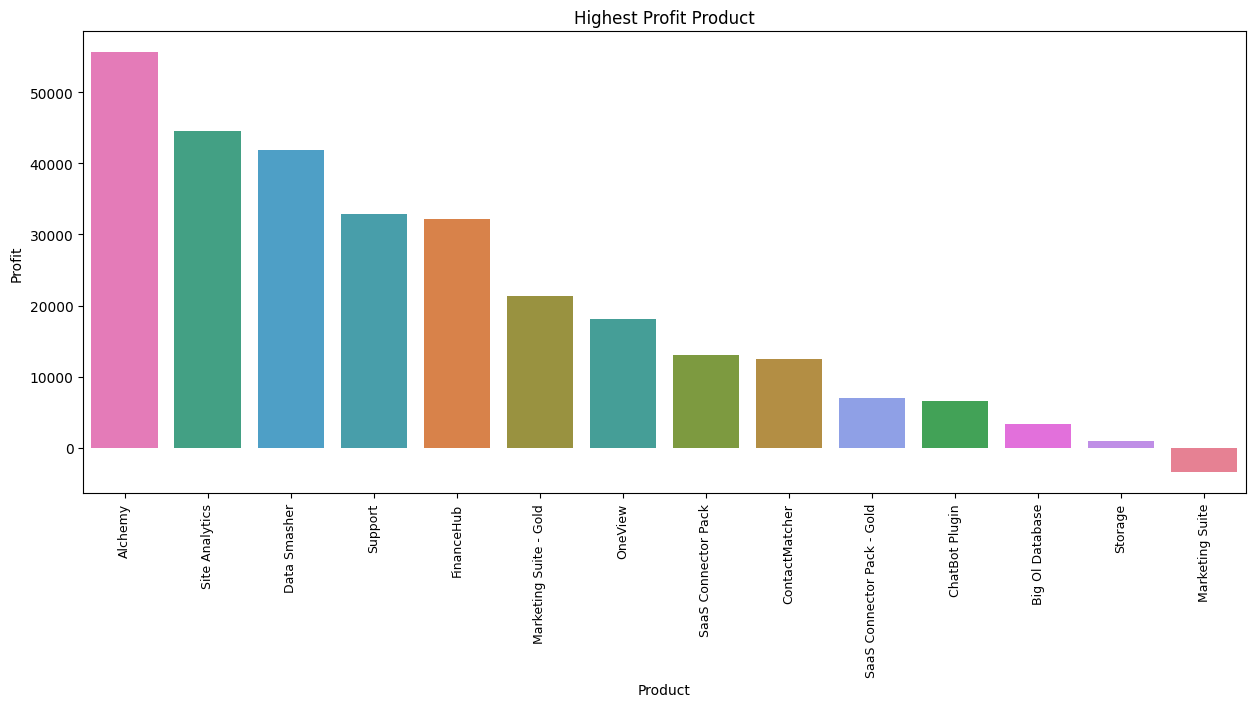

In [29]:
# Highest Profit Product
sort_profit= df3.groupby("Product")["Profit"].sum().sort_values(ascending= False).index

plt.figure(figsize= (15,6))
sns.barplot(data= df3,
            x= "Product",
            y= "Profit",
            estimator= np.sum,
            hue= "Product",
            ci= 0,
            order= sort_profit)
plt.xticks(fontsize= 9,
           rotation= 90)
plt.title("Highest Profit Product")
plt.show()

In [30]:
df[df["Product"]== "Storage"]["Discount"].mode()

0    0.0
Name: Discount, dtype: float64

- Produk **Alchemy** menjadi produk dengan jumlah profit tertinggi sepanjang tahun meski salesnya berada di peringkat ke 7
- Namun produk **ContactMatcher** yang menjadi produk dengan jumlah sales tertinggi malah menghasilkan profit yang kecil
- Produk **Marketing Suite** menghasilkan profit yang negatif/rugi

### 4) Analisa Pelanggan 
- Top 10 customer berdasarkan sales dan profit?
- Industri mana yang paling membutuhkan Sales and Marketing software?
- Segmentasi mana yang lebih menguntungkan (SMB/Strategic)?

In [31]:
df4= df[["Sales", "Profit", "Customer", "Industry", "Segment"]]
df4

,Sales,Profit,Customer,Industry,Segment
0,261.9600,41.9136,Chevron,Energy,SMB
1,731.9400,219.5820,Chevron,Energy,SMB
2,14.6200,6.8714,Phillips 66,Energy,Strategic
3,957.5775,-383.0310,Royal Dutch Shell,Energy,SMB
4,22.3680,2.5164,Royal Dutch Shell,Energy,SMB
...,...,...,...,...,...
9989,25.2480,4.1028,Johnson & Johnson,Healthcare,SMB
9990,91.9600,15.6332,American Express,Finance,SMB
9991,258.5760,19.3932,American Express,Finance,SMB
9992,29.6000,13.3200,American Express,Finance,SMB


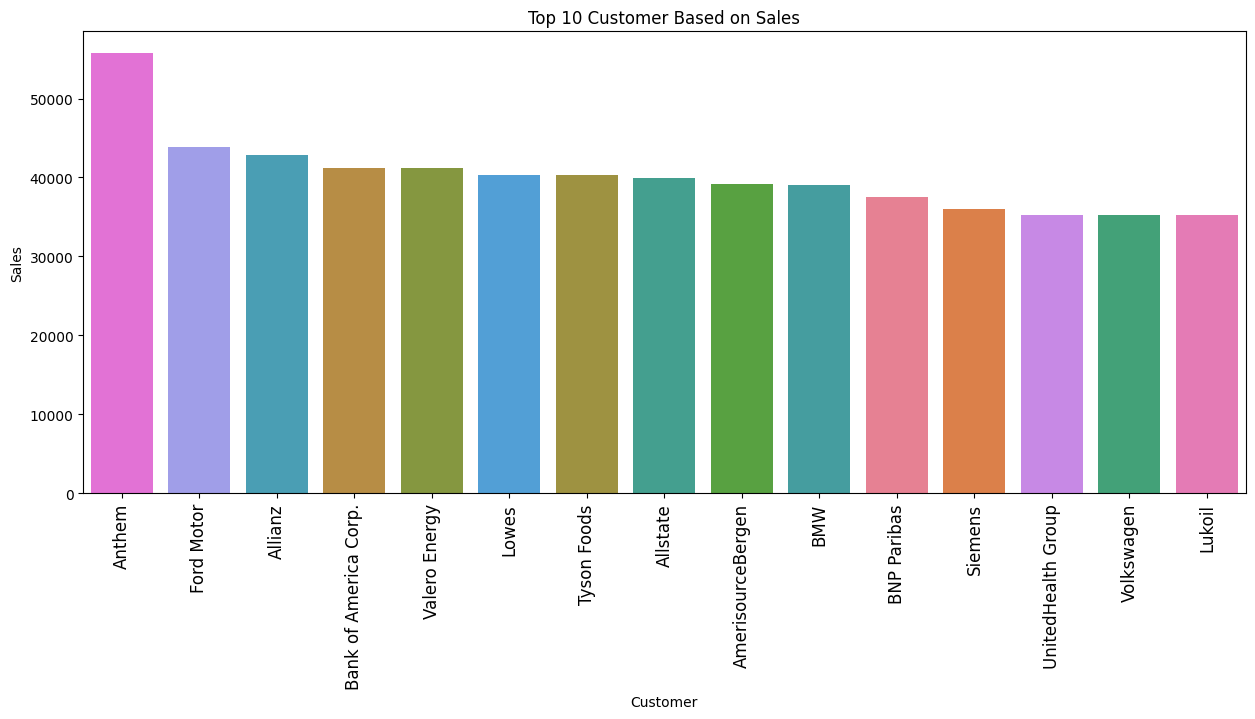

In [32]:
# Top 10 customer based on sales
top10_sales= df4.groupby("Customer")["Sales"].sum().sort_values(ascending= False).head(15)
sales_sort= top10_sales.index

plt.figure(figsize= (15,6))
sns.barplot(data= df4[df4["Customer"].isin(sales_sort)],
            x= "Customer",
            y= "Sales",
            estimator= np.sum,
            hue= "Customer",
            ci= 0,
            order= sales_sort)
plt.xticks(fontsize= 12,
           rotation= 90)
plt.title("Top 10 Customer Based on Sales")
plt.show()

- **Anthem** merupakan customer dengan jumlah sales tertinggi

In [33]:
anthem= df[df["Customer"]== "Anthem"][["Customer", "Product", "Quantity"]]
anthem

,Customer,Product,Quantity
456,Anthem,FinanceHub,2
496,Anthem,ContactMatcher,8
497,Anthem,SaaS Connector Pack,4
498,Anthem,FinanceHub,2
499,Anthem,SaaS Connector Pack,9
...,...,...,...
9609,Anthem,SaaS Connector Pack,4
9610,Anthem,FinanceHub,9
9628,Anthem,Support,7
9629,Anthem,ContactMatcher,2


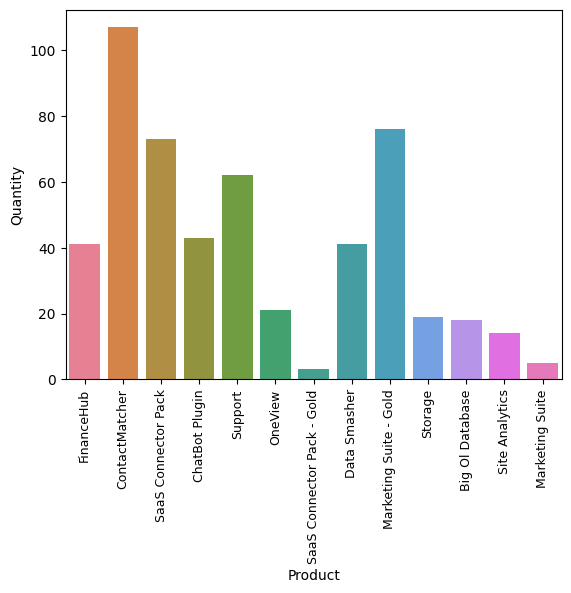

In [34]:
sns.barplot(data= anthem,
            x= "Product",
            y= "Quantity",
            estimator= np.sum,
            hue= "Product",
            ci=0)
plt.xticks(fontsize= 9,
           rotation= 90)
plt.show()

- Produk yang dibelanjakan berulang oleh perusahaan **Anthem** adalah **ContactMatcher**

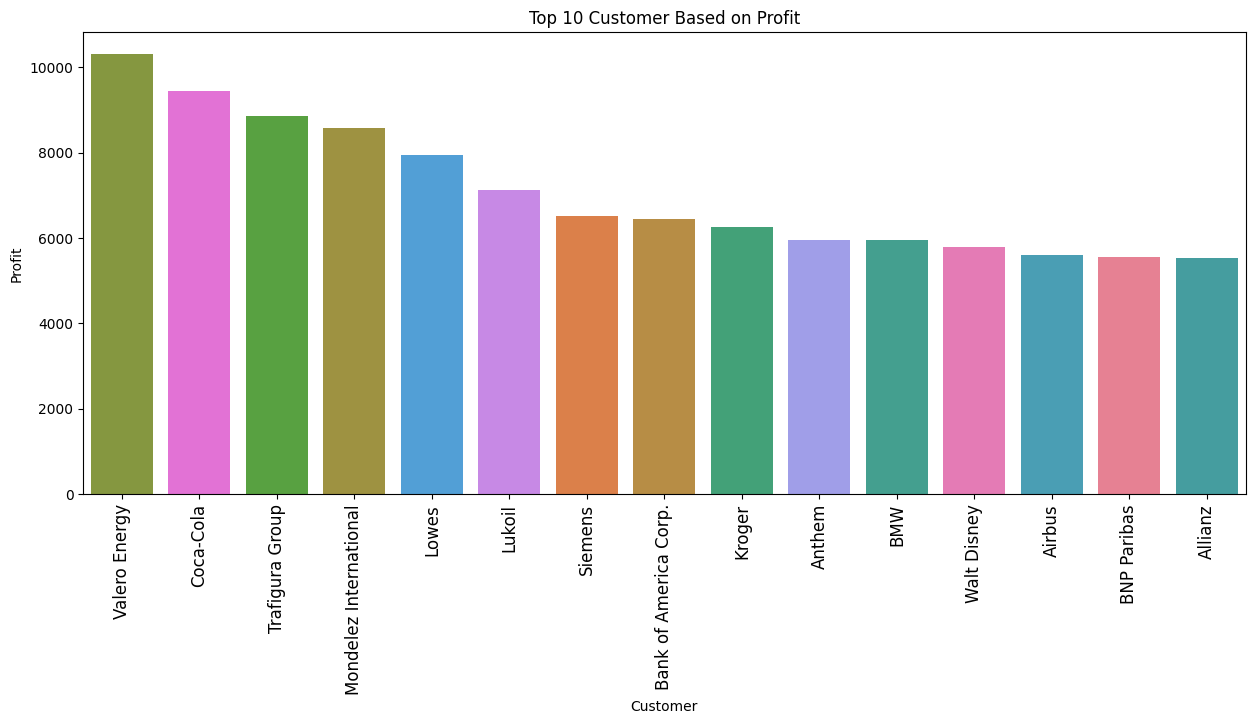

In [35]:
# Top 10 customer based on profit
top10_sales= df4.groupby("Customer")["Profit"].sum().sort_values(ascending= False).head(15)
sales_sort= top10_sales.index

plt.figure(figsize= (15,6))
sns.barplot(data= df4[df4["Customer"].isin(sales_sort)],
            x= "Customer",
            y= "Profit",
            estimator= np.sum,
            hue= "Customer",
            ci= 0,
            order= sales_sort)
plt.xticks(fontsize= 12,
           rotation= 90)
plt.title("Top 10 Customer Based on Profit")
plt.show()

- **Valero Energy** merupakan customer yang menghasilkan profit tertinggi

In [36]:
df4[df4["Customer"]== "Valero Energy"]

,Sales,Profit,Customer,Industry,Segment
97,51.312,17.9592,Valero Energy,Energy,SMB
648,14.800,6.0680,Valero Energy,Energy,Strategic
649,302.376,22.6782,Valero Energy,Energy,Strategic
650,316.000,31.6000,Valero Energy,Energy,Strategic
800,22.230,7.3359,Valero Energy,Energy,Strategic
...,...,...,...,...,...
9947,1925.880,539.2464,Valero Energy,Energy,Strategic
9948,2405.200,793.7160,Valero Energy,Energy,Strategic
9949,83.970,15.9543,Valero Energy,Energy,Strategic
9950,39.890,14.7593,Valero Energy,Energy,Strategic


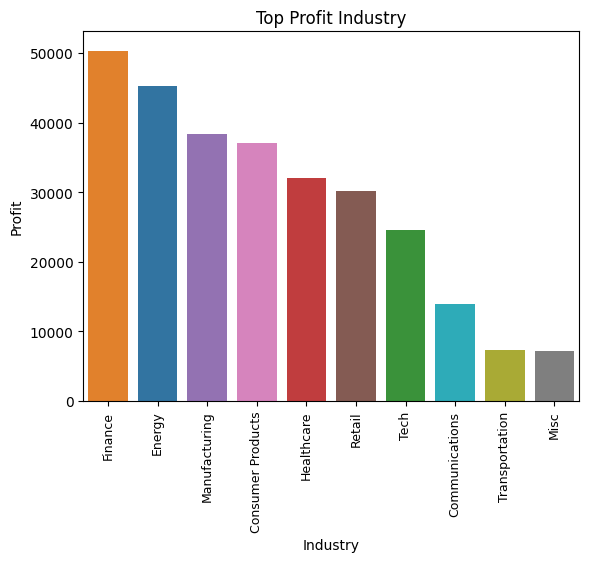

In [37]:
# Top profit industry
sort_industry= df4.groupby("Industry")["Profit"].sum().sort_values(ascending= False).index

sns.barplot(data= df4,
            x= "Industry",
            y= "Profit",
            ci= 0,
            estimator= np.sum,
            hue= "Industry",
            order= sort_industry)
plt.xticks(fontsize= 9,
           rotation= 90)
plt.title("Top Profit Industry")
plt.show()


- Industri **Finance** merupakan industri dengan profit tertinggi yang berarti perusahaan-perusahaan di bidang tersebut kebutuhan software-nya tinggi

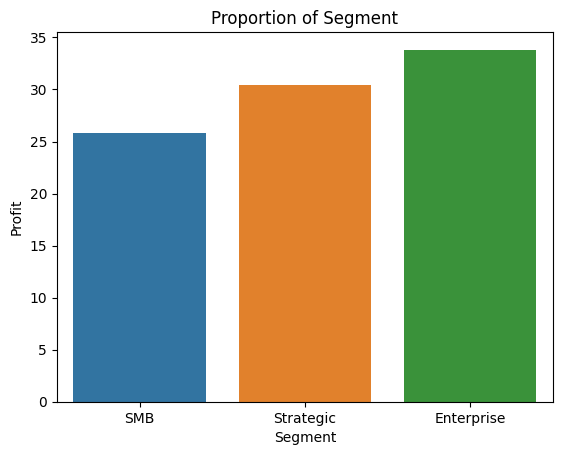

In [38]:
# Proportion of segment
sns.barplot(data= df4,
            x= "Segment",
            y= "Profit",
            estimator= np.mean,
            ci= 0,
            hue= "Segment")
plt.title("Proportion of Segment")
plt.show()


Segment terbagi menjadi SMB, Strategic, dan Enterprise.
1. SMB (Small and Medium Business) -> perusahaan kecil dan menengah
2. Enterprise -> perusahaan besar dengan struktur lebih kompleks
3. Strategic -> perusahaan yang memiliki potensi revenue tinggi dan hubungan jangka panjang

- Perusahaan **SMB** menjadi customer paling menguntungkan.

### 5) Analisa Diskon dan Profitability
- Berapa profit margin per produk?
- Bagaimana korelasi antara discount dan profit?



In [39]:
df5= df[["Sales", "Profit", "Discount", "Product"]]
df5

,Sales,Profit,Discount,Product
0,261.9600,41.9136,0.00,Marketing Suite
1,731.9400,219.5820,0.00,FinanceHub
2,14.6200,6.8714,0.00,FinanceHub
3,957.5775,-383.0310,0.45,ContactMatcher
4,22.3680,2.5164,0.20,Marketing Suite - Gold
...,...,...,...,...
9989,25.2480,4.1028,0.20,SaaS Connector Pack
9990,91.9600,15.6332,0.00,SaaS Connector Pack
9991,258.5760,19.3932,0.20,Site Analytics
9992,29.6000,13.3200,0.00,Support


In [40]:
# Profit margin per Product
df5["Profit Margin"]= (df5["Profit"] / df["Sales"]) * 100

margin_product= df5.groupby("Product")[["Sales", "Profit"]].sum().assign(Profit_Margin= lambda x: (x["Profit"] / x["Sales"]) * 100).sort_values("Profit_Margin", ascending= False)
margin_product

,Sales,Profit,Profit_Margin
Product,,,
SaaS Connector Pack - Gold,16476.4020,6964.1767,42.267582
Alchemy,149528.0300,55617.8249,37.195585
Storage,3024.2800,949.5182,31.396504
Support,125152.7440,32864.4698,26.259488
Data Smasher,167380.3180,41936.6357,25.054700
ChatBot Plugin,27118.7920,6527.7870,24.071083
OneView,107532.1610,18138.0054,16.867517
SaaS Connector Pack,91705.1640,13059.1436,14.240358
Site Analytics,330007.0540,44515.7306,13.489327


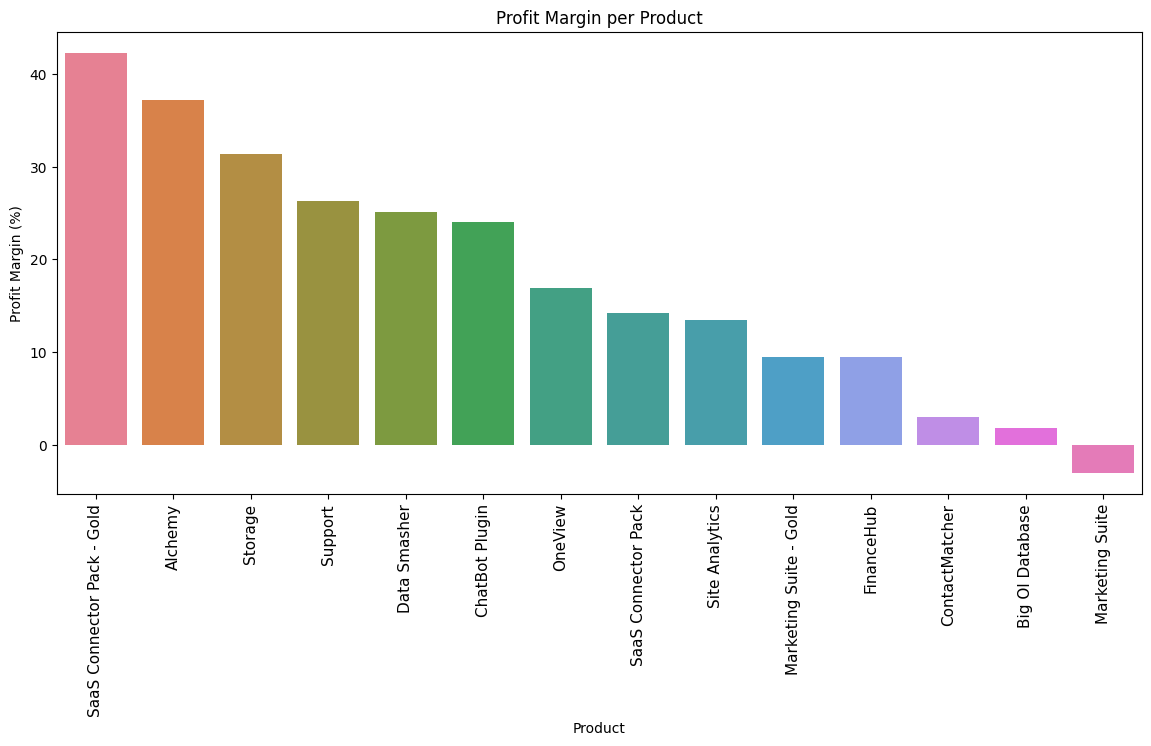

In [41]:
plt.figure(figsize= (14,6))
sns.barplot(data= margin_product,
            x= "Product",
            y= "Profit_Margin",
            hue= "Product")
plt.xticks(rotation= 90,
           fontsize= 11)
plt.ylabel("Profit Margin (%)")
plt.title("Profit Margin per Product")
plt.show()

- Produk **SaaS Connector Pack - Gold** merupakan produk dengan profit margin tertinggi
- Produk **Marketing Suite** merupakan produk dengan profit margin negatif/rugi

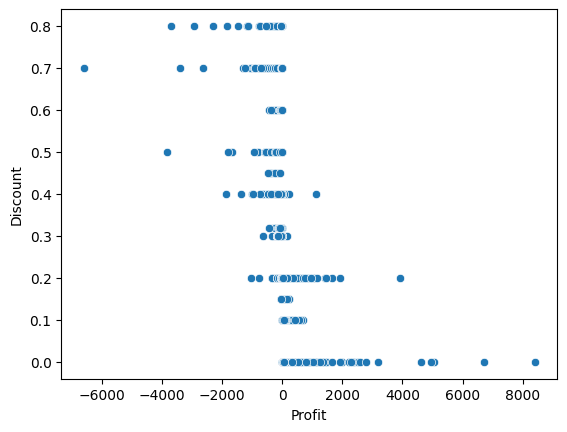

In [42]:
# Correlation between discount and profit
sns.scatterplot(data= df5,
                x= "Profit",
                y= "Discount")
plt.show()

- Tampak korelasi yang **negatif**
- Banyak titik diskon di atas 0,4 yang menghasilkan profit negatif/rugi, yang berarti semakin besar diskon maka semakin rugi profitnya
- Profit tinggi (4000-8000) hanya tampak pada titik diskon kecil dan 0%
- Tampak profit negatif/rugi pada titik diskon di atas 15%



## **IV. KESIMPULAN DAN REKOMENDASI**

### 1) Kesimpulan

Berdasarkan analisa di atas, dapat disimpulkan sebagai berikut.
- Negara **United States** dan **New York City** menjadi negara dan kota dengan jumlah sales dan profit tertinggi, serta berbanding lurus dengan profitnya. 
- Produk **ContactMatcher** menjadi produk dengan sales tertinggi dan mengalami pertumbuhan setiap tahunnya, sedangkan produk **Storage** merupakan produk dengan sales terendah dan stagnan.
- Namun produk **ContactMatcher** mengalami penurunan profit secara drastis pada rentang tahun 2022-2023.
- Produk **Alchemy** menjadi produk dengan profit tertinggi dan mengalami pertumbuhan profit secara konsisten setiap tahunnya, sedangkan produk **Big Ol Database** dan **ContactMatcher** mengalami penurunan yang signifikan di tehun 2022 s/d 2023.
- Produk **Marketing Suite** berada di peringkat sales ke-9 yaitu sebesar **114.879**, namun penjualannya merugi.
- Perusahaan **Anthem** menghasilkan sales tertinggi, sedangkan perusahaan **Valero Energy** menghasilkan profit tertinggi.
- Industri yang paling menguntungkan adalah industri **Finance**.
- Produk **Marketing Suite** memiliki profit margin yang negatif/rugi.
- Profit dan diskon berkorelasi negatif -> semakin tinggi diskon, maka semakin rendah profit yang didapatkan.





### 2) Rekomendasi

a) Produk-produk software yang perlu diperhatikan:  
    - Alchemy  
    - Contact Matcher  
    - Storage  
    - Marketing Suite  
    Evaluasi produk-produk dengan penjualan rendah atau di bawah rata-rata. Perlu juga dilakukan upgrade fitur agar bersaing dengan kompetitor.  


b) Melakukan penyesuaian diskon produk  
    - Diskon dibatasi maksimal 15% dengan syarat dan ketentuan yang berlaku, karena di atas angka tersebut beresiko kerugian.  
    - Profit yang maksimal tampak pada produk dengan diskon 0%, yang berarti pengaplikasian diskon sebaiknya di hari-hari tertentu saja, seperti hari raya nasional.  

c) Promo  
    - Produk-produk dengan penjualan rendah seperti Storage, sebaiknya dibuatkan sistem bundling dengan produk berprofit tinggi seperti Alchemy.  
    - Pemberian diskon 10% di event hari raya nasional.  
    - Pemberian garansi sampai 3 bulan, apabila ada kerusakan.  

d) Customer   
    - Customer pareto sebagai backbone seperti Anthem, sebaiknya diberikan bonus akhir tahun untuk menjaga hubungan baik dan loyalitas, selain itu juga menarik customer lain untuk ikut meningkatkan sales mereka.  
    - Customer dengan sales dan profit di bawah rata-rata sebaiknya ditawarkan kontak kerja sama dengan return yang menarik. Hal ini diharapkan bisa meningkatkan sales.  
    
e) Pada tahun 2022 ke 2023, terjadi penurunan sales dan profit secara global. Cari tau faktor externalnya, seperti kompetitor baru, customer churn, dan lainnya.

